In [1]:
import pandas as pd

In [2]:
medical_df = pd.read_csv("data/insurance.csv")

In [3]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Installing Plotly Matplotlib seaborn library for better visualisations

In [6]:
!pip3 install plotly matplotlib seaborn --quiet

In [ ]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  
# above line for showing image in this tab not in another and also  for remains in this tab   

In [8]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize']  = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Trying to find relation of charges with age

In [9]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [10]:
fig = px.histogram(medical_df,x='age',marginal='box',nbins=47,title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

### Trying to find relations with BMI

In [11]:
fig = px.histogram(medical_df,x='bmi',marginal='box',color_discrete_sequence=['red'] ,nbins=47,title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

### Visualization of charge

In [12]:
fig = px.histogram(medical_df,x='charges',marginal='box',color='smoker',color_discrete_sequence=['green', 'grey'] ,nbins=47,title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

### Visualizing smoker with value yes or no

In [13]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [14]:
px.histogram(medical_df, x='smoker', color='sex', title='Smoker')

In [15]:
fig = px.scatter(medical_df,x='age',y='charges',color='smoker',opacity=0.8,hover_data=['sex'],title='Age vs Charges')
fig.update_traces(marker_size=5)
fig.show()

In [16]:
fig = px.scatter(medical_df,x='bmi',y='charges',color='smoker',opacity=0.8,hover_data=['sex'],title='BMI vs Charges')
fig.update_traces(marker_size=5)
fig.show()

In [17]:
px.violin(medical_df, x='children',y='charges')

### Correlation

In [18]:
medical_df.charges.corr(medical_df.age)

np.float64(0.2990081933306476)

In [19]:
medical_df.charges.corr(medical_df.bmi)

np.float64(0.19834096883362895)

In [20]:
medical_df.charges.corr(medical_df.children)

np.float64(0.06799822684790478)

In [21]:
medical_df.smoker

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

To compute the correlation for categorical coloumns, they must first be converted into numeric columns


In [22]:
smoker_values = {'no':0, 'yes':1}
smoker_numeric = medical_df.smoker.map(smoker_values)
smoker_numeric

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [23]:
print(medical_df.dtypes)

medical_df.head()

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [24]:
medical_df.charges.corr(smoker_numeric)

np.float64(0.787251430498478)

### I don't know why below step are running

In [25]:
# medical_df.corr()

In [26]:
# sns.heatmap(medical_df.corr(),cmap='Reds',annot=True)
# plt.title("Correlation Matrix");

In [27]:
px.scatter(medical_df, x='age', y= 'age')

### Linear Regression using a Single Feature

In [28]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

<Axes: title={'center': 'Age vs Charges'}, xlabel='age', ylabel='charges'>

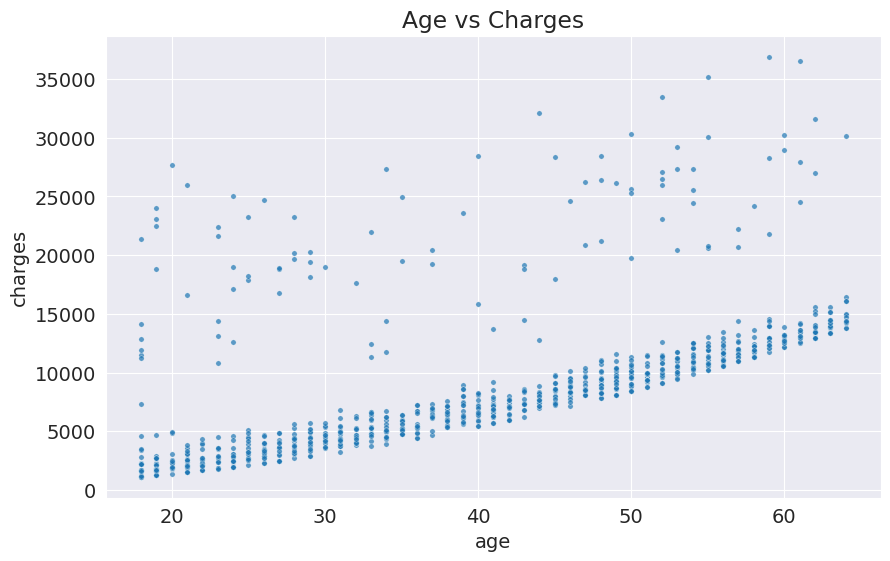

In [29]:
plt.title('Age vs Charges')
sns.scatterplot(data= non_smoker_df, x='age', y='charges',alpha=0.7, s = 15)

### Model

In [30]:
def estimate_charges(age, w, b):   # this is estimated charges function and guessing the value of w and b and it is our first model
    return w * age + b

In [31]:
w = 50
b = 100

In [32]:
estimate_charges(30,w,b)

1600

In [33]:
ages = non_smoker_df.age
ages

1       18
2       28
3       33
4       32
5       31
        ..
1332    52
1333    50
1334    18
1335    18
1336    21
Name: age, Length: 1064, dtype: int64

In [34]:
estimated_charges  = estimate_charges(ages,w,b)
estimated_charges

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [35]:
non_smoker_df.charges

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

Text(0, 0.5, 'Estimated_charges')

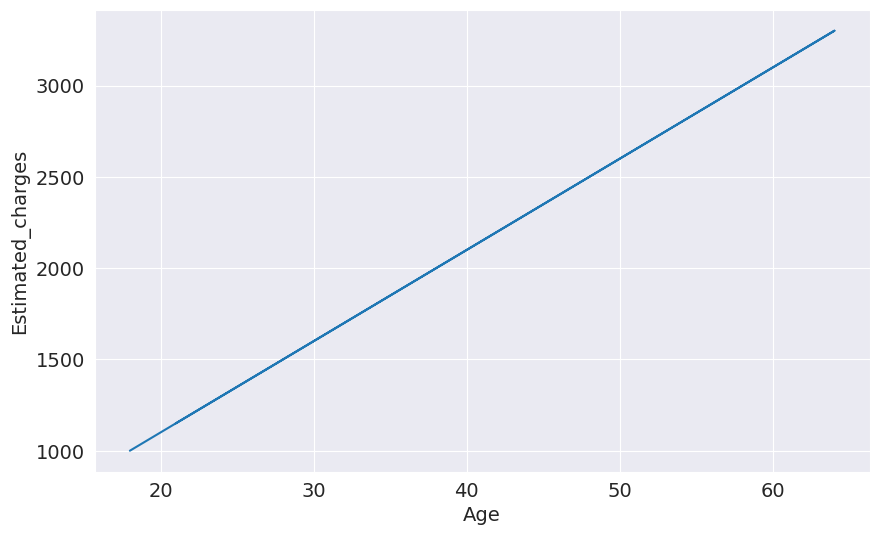

In [36]:
plt.plot(ages, estimated_charges);
plt.xlabel("Age");
plt.ylabel("Estimated_charges")

As expectecd,the points lie on a straight line.
We can overlay this line on the actual data, so see how well our model fits the data.

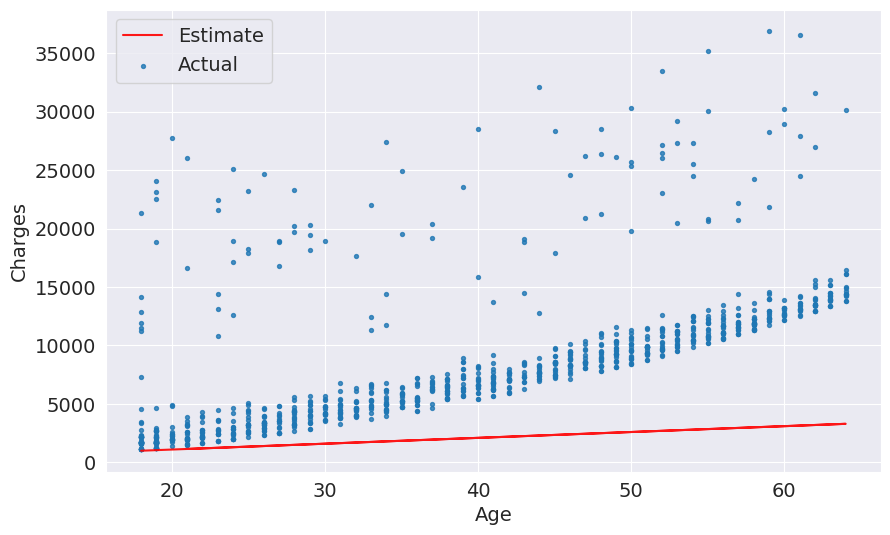

In [37]:
target = non_smoker_df.charges
plt.plot(ages, estimated_charges, 'r', alpha=0.9);

plt.scatter(ages, target, s=8, alpha=0.8);
plt.xlabel("Age");
plt.ylabel("Charges")
plt.legend(['Estimate','Actual'])

Our estimates are quite poor and the line does not "fit" the data, now try different values of w and b

In [38]:
def try_parameters(w,b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    
    estimated_charges = estimate_charges(ages, w,b)
    
    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8, alpha=0.8);
    plt.xlabel("Age");
    plt.ylabel("Charges")
    plt.legend(['Estimate','Actual'])

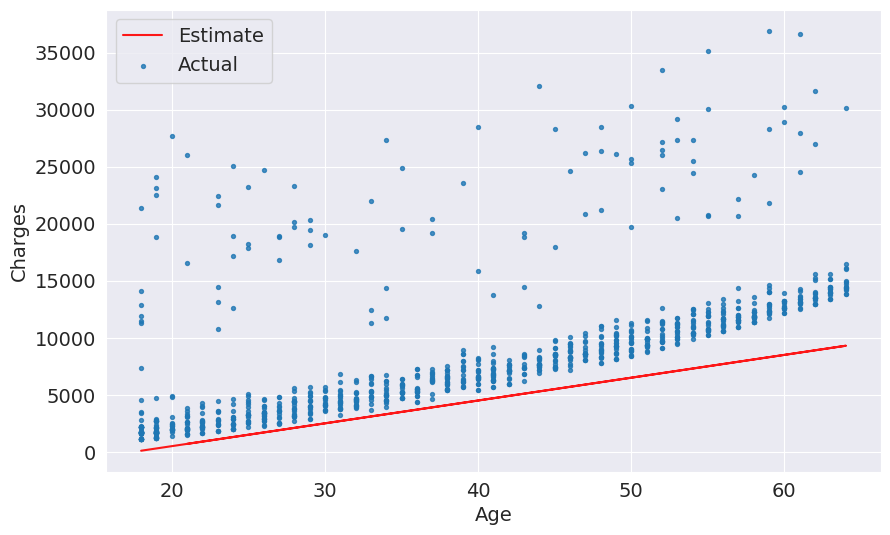

In [39]:
try_parameters(200,-3500)

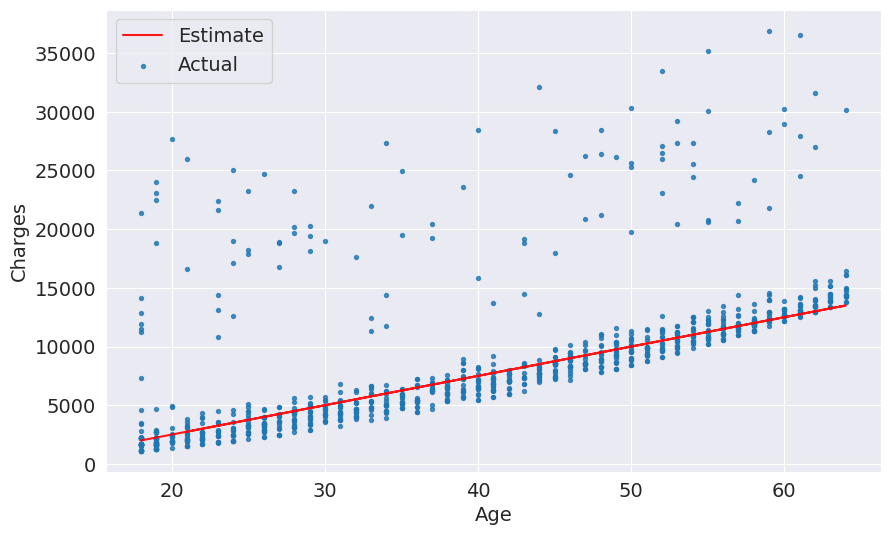

In [40]:
try_parameters(250,-2500)

In [41]:
targets = non_smoker_df.charges
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [42]:
predictions = estimated_charges
predictions

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

### Trying to find root mean square error

In [43]:
import numpy as np

In [44]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

### Let compute the RMSE for our model with a sample set of weights

In [45]:
w = 50
b = 100

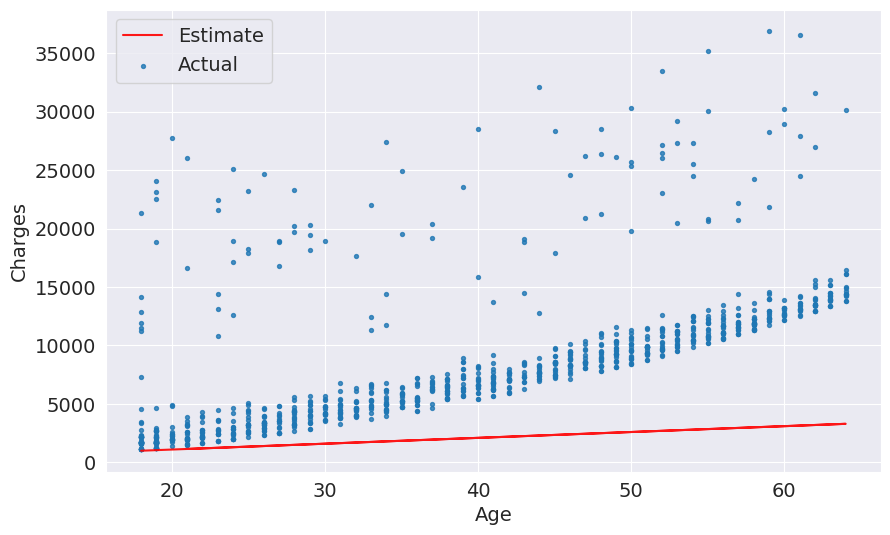

In [46]:
try_parameters(w,b)

In [47]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w,b)

In [48]:
rmse(targets, predicted)

np.float64(8461.949562575493)

In [49]:
def try_parameters(w,b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    
    predictions = estimate_charges(ages, w,b)
    
    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8, alpha=0.8);
    plt.xlabel("Age");
    plt.ylabel("Charges")
    plt.legend(['Prediction','Actual']);
    
    loss = rmse(targets, predictions)
    print("RMSE Loss: ", loss)

RMSE Loss:  4663.783442791926


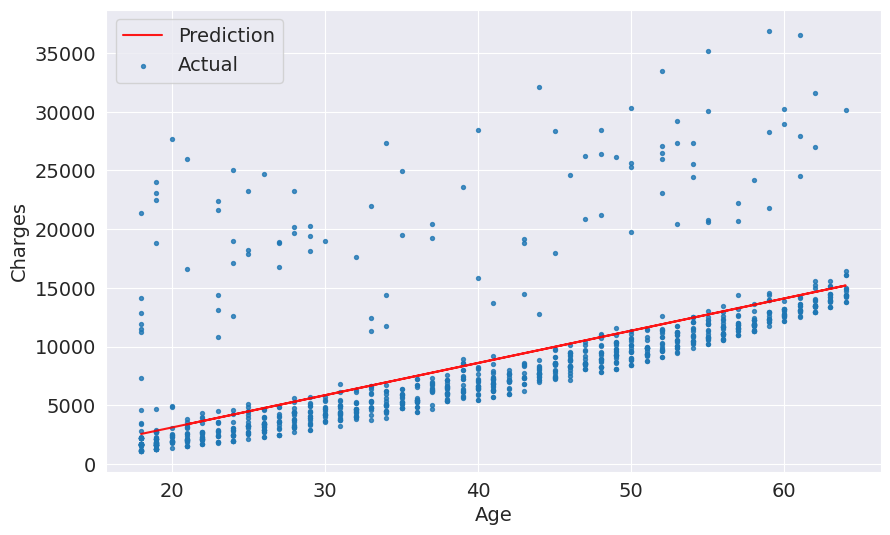

In [50]:
try_parameters(275, -2400)

### Linear Regression using Scikit-learn
In practice, you'll never used to implement either of the above methods yourself. You can use a  library like "scikit-learn" to do this for you.

In [51]:
!pip3 install scikit-learn --quiet

Let's use the LinearRegression class from scikit-learn to find the best fit line for "age" vs. "charges" using the ordinary least squares optimization technique

### First way by using LinearRegression class

In [52]:
from sklearn.linear_model import LinearRegression

First, we create a new model object

In [53]:
model = LinearRegression()

Next, we can use the fit method of the model to find the best fit line for the inputs and targets.

In [54]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.

    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.

    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.

    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.

        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.

    Returns
    -------
    self : object
        Fitted Estimator.



### Note that the input X must be 2-d array, so we'll need to pass a dataframe

In [55]:
input = non_smoker_df[['age']]
targets = non_smoker_df.charges
print('input.shape : ', input.shape)
print('targets.shape : ', targets.shape)

input.shape :  (1064, 1)
targets.shape :  (1064,)


### Let's fit the model to the data

In [56]:
model.fit(input, targets)

LinearRegression()

We can now make predictions using the model. Let's try to predict the charges for the ages 23, 37 and 61

In [57]:
model.predict(np.array([[23],[37],[61]]))

/home/anilkumarsingh/MediPredict/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [58]:
model.predict(pd.DataFrame([[23], [37], [61]], columns=['age'])) # same step as above but alternative way 


array([ 4055.30443855,  7796.78921819, 14210.76312614])

### Let's compute the predictions for the enitre set of input

In [59]:
predictions = model.predict(input)

In [60]:
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289], shape=(1064,))

In [61]:
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

### Let's compute the RMSE loss to evalute the model.

In [62]:
rmse(targets, predictions)

np.float64(4662.505766636395)

Seems like our prediction is off by $4000 on average, which is not too bad cosidering the fact that there are several outliers.

### The parameters of the model are stored in the "coef_" and "itercept_ properties.

In [63]:
# W
model.coef_

array([267.24891283])

In [64]:
# b
model.intercept_

np.float64(-2091.4205565650864)

RMSE Loss:  4662.505766636395


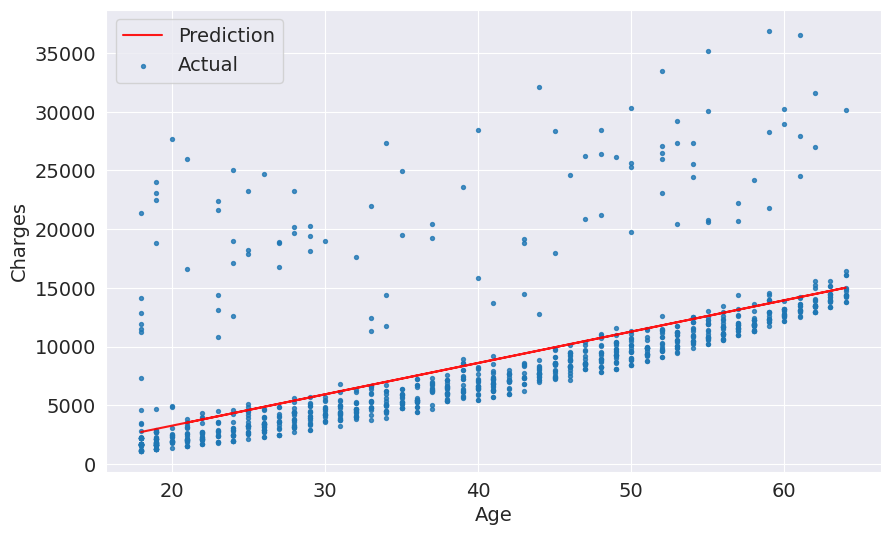

In [65]:
try_parameters(267.24891283,-2091.4205565650864)

these parameters are very close to my guess value i.e. w = 275 and b = -2400 and  RMSE Loss:  4663.783442791926

### Second way by using SGDRegressor class

In [66]:
from sklearn.linear_model import SGDRegressor

In [67]:
model = SGDRegressor()

In [68]:
model.fit(input, targets)

SGDRegressor()

In [69]:
model.predict(np.array([[23],[37],[61]]))

/home/anilkumarsingh/MediPredict/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but SGDRegressor was fitted with feature names



array([2746.4155266 , 4760.91311527, 8214.337553  ])

In [70]:
predictions = model.predict(input)
predictions

array([2026.95210207, 3465.87895113, 4185.34237565, ..., 2026.95210207,
       2026.95210207, 2458.63015679], shape=(1064,))

In [71]:
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [72]:
rmse(targets, predictions)

np.float64(5986.983213057576)

In [73]:
model.coef_

array([143.89268491])

In [74]:
model.intercept_

array([-563.11622622])

RMSE Loss:  5986.983213057576


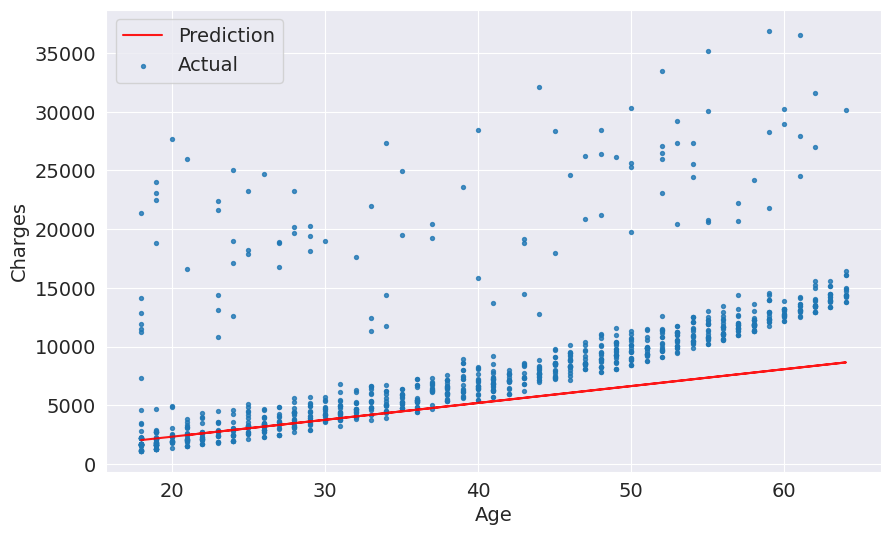

In [75]:
try_parameters(model.coef_, model.intercept_)

From above graph and value we can see that SGDRegressor is not good for our dataset

### Now repeating same steps for the Smoker == Yes

### See  into the homework file

### "Machine Learning" 
As we've seen above, it takes just few lines of code to train a machine learning model using "scikit-learn".

In [76]:
# Create inputs and targest
inputs, targets = non_smoker_df[['age']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print("Loss: ", loss)

Loss:  4662.505766636395


### Linear Regression using Multiple Features
So far, we've used on the 'age' feature to estimate 'charges'. Adding another feature like 'bmi' is fairly straightforward. We simply assume the following relationship:

### charges = w1 * age + w2 * bmi + b

We need to  change just one line of code to include the BMI.


In [77]:
# Create inputs and targest
inputs, targets = non_smoker_df[['age', 'bmi']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print("Loss: ", loss)

Loss:  4662.3128354612945


As you can see that, adding the BMI doesn't seem to reduce the loss by much, as the BMI has a very weak correlation with charges, especially for non smokers.

In [78]:
non_smoker_df.charges.corr(non_smoker_df.bmi)

np.float64(0.0840365431283327)

In [79]:
fig = px.scatter(non_smoker_df, x='bmi', y='charges',title='BMI vs Charges')
fig.update_traces(marker_size = 5)
fig.show()

You can see that it's harder to interpret a 3D scatter plot compared to a 2D scatter plot. As we add more features, it becomes impossible to visualize all feauter at once, which is why we use measures like correlation and loss.

### let's check parameter of model

In [80]:
model.coef_, model.intercept_

(array([266.87657817,   7.07547666]), np.float64(-2293.6320906488727))

Clearly, BMI has a much lower weightage, and you can see why. It has a tiny contribution, and even that is probably accidental. This is an important thing to keep in mind: you can't find a relationship that doesn't exist, no matter what machine learning technique or optimization algorithm you apply.

Let's go one step further, and add the final numeric column: 'children', which seems to have some correlation with "charges".

### charges = w1 * age + w2 * bmi+ w3 * charges + b

In [81]:
non_smoker_df.charges.corr(non_smoker_df.children)

np.float64(0.13892870453542192)

In [82]:
fig = px.strip(non_smoker_df, x='children', y='charges',title='Children vs Charges')
fig.update_traces(marker_size = 5, marker_opacity = 0.7)
fig.show()

In [83]:
# Create inputs and targest
inputs, targets = non_smoker_df[['age', 'bmi','children']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print("Loss: ", loss)

Loss:  4608.470405038247


Once again, we don't see a big reduction in the loss, even though it's greater than in the case of BMI.

### Repeating the above steps for both smoker and non smoker

In [84]:
# Create inputs and targest
inputs, targets = medical_df[['age', 'bmi','children']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print("Loss: ", loss)

Loss:  11355.317901125973


Here, Loss is much more high and due to this our model became useless
see the reason below, we can't fit the line

In [85]:
fig = px.scatter(medical_df, x='age', y='charges',color='smoker', title='Age vs Charges')
fig.update_traces(marker_size = 5)
fig.show()

### Using Categorical Features for Machine Learning

So far we've been using only numeric columns, since we can only perform computations with numbers. If we could use categorical columns like "smoker", we can train a single model for the entire dataset.

To use the categorical columns, we simply need to convert them to numbers. There are three common techniques for doing this:

    1. If a categorical column has just two categories (it's called a binary category), then we can replace their values with 0 and 1.

    2. If a categorical column has more than 2 categories, we can perform one-hot encoding i.e. create a new column for each category with 1s and Os.

    3. If the categories have a natural order (e.g. cold, neutral, warm, hot), then they can be converted to numbers (e.g. 1, 2, 3, 4) preserving the order. These are called ordinals

### Binary Categories

The "smoker" category has just two values "yes" and "no". Let's create a new column "smoker_code" containing 0 for "no" and 1 for "yes".

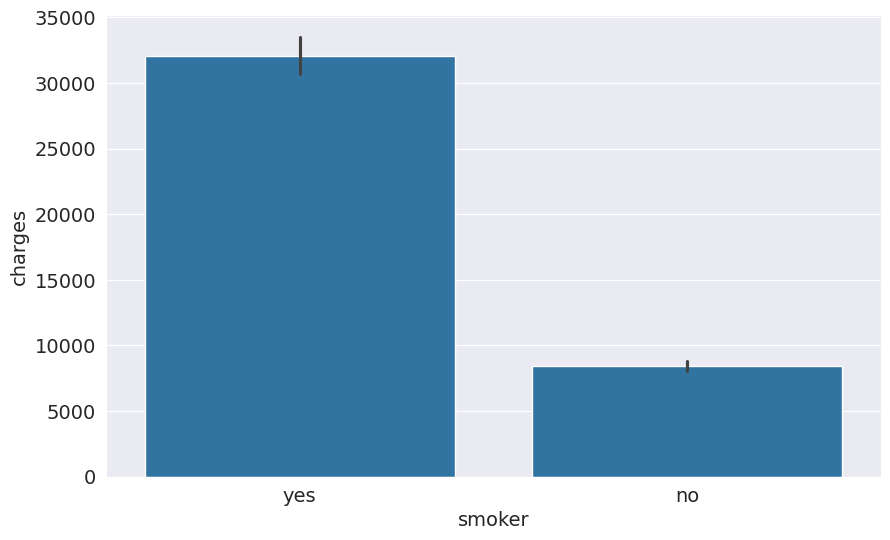

In [86]:
sns.barplot(data=medical_df, x='smoker', y = 'charges');

In [87]:
smoker_code = {'no':0, 'yes':1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_code)

In [88]:
medical_df.charges.corr(medical_df.smoker_code)

np.float64(0.787251430498478)

In [89]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0


### We can now use the smoker_code column for linear regression.
### chages = w1 * age + w2 * bmi + w3 * chages + w4 * smoker + b

In [90]:
# Create inputs and targest
inputs, targets = medical_df[['age', 'bmi','children','smoker_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print("Loss: ", loss)

Loss:  6056.439217188081


### Note, never ignore Categorical data

The loss reduces from 11355 to 6056, almost by 50%! This is an important lesson.
Let's try adding the 'sex' column as well
### charges = w1 * age + w2 * bmi + w3 * charges + w4 * smoker + w5 * sex + b

<Axes: xlabel='sex', ylabel='charges'>

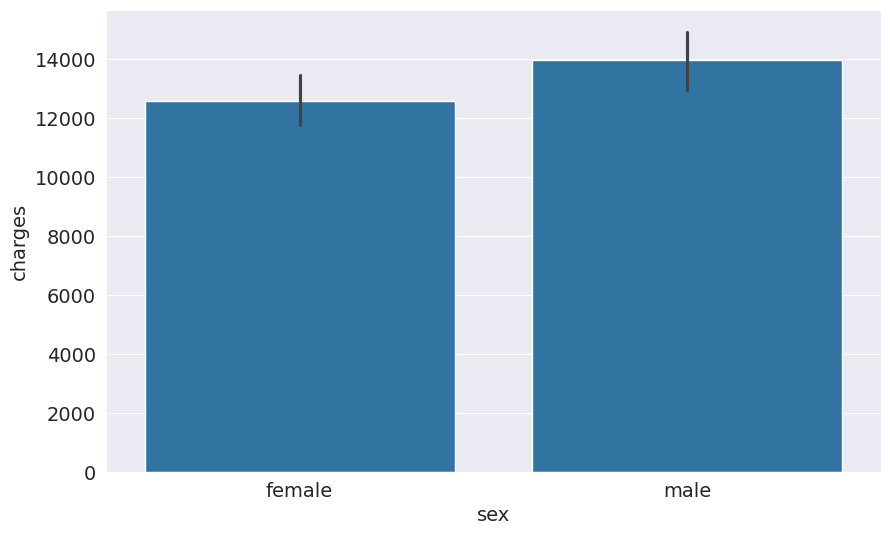

In [91]:
sns.barplot(data=medical_df, x= 'sex', y='charges')

In [92]:
sex_code = {'female':0, 'male':1}

In [93]:
medical_df['sex_code'] = medical_df.sex.map(sex_code)

In [94]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1


In [95]:
medical_df.charges.corr(medical_df.sex_code)

np.float64(0.057292062202025484)

In [96]:
# Create inputs and targest
inputs, targets = medical_df[['age', 'bmi','children','smoker_code','sex_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print("Loss: ", loss)

Loss:  6056.100708754546


As you see that, this does not have a significant effect, we my ignore this "sex" coloumn

### One-hot Encoding
The 'region' column contains 4 values, so we'll need to use hot encoding and create a new column for each region.
"""[
 Index | Categorical column  
  1    |    catg. A
  2    |    catg. B
  3    |    catg. C
]  """

From above table to below table

"""[
 Index | Catg. A  | catg. B | catg. C  
  1    |    1     |    0     |  0
  2    |    0     |    1     |  0
  3    |    0     |    0     |  1
] """ 


Looks above table in edit mode

<Axes: xlabel='region', ylabel='charges'>

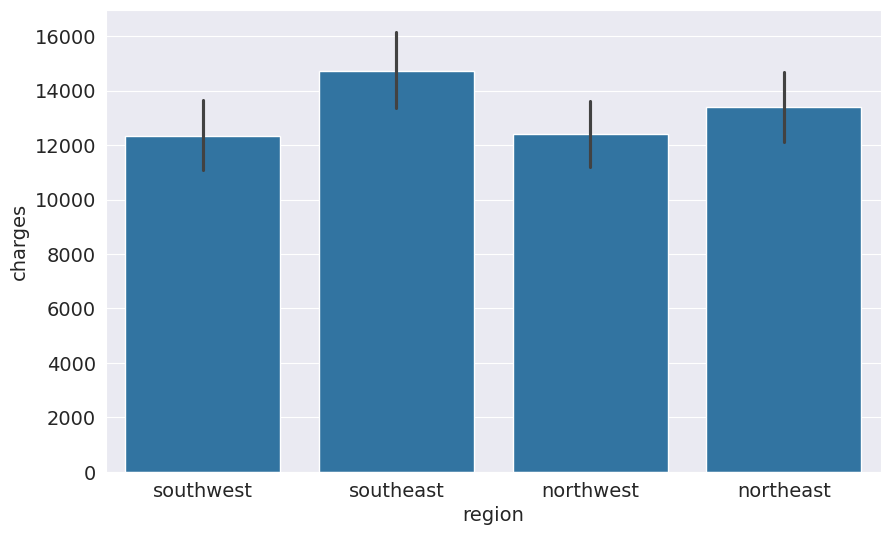

In [97]:
sns.barplot(data=medical_df, x='region', y ='charges')

### Now use 'OneHotEncoder' class from 'preprocessing'

In [98]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()   
enc.fit(medical_df[['region']])  # this line used for basically for identifying the region
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [99]:
enc.transform([['northeast'],     
               ['northwest']]).toarray()    # type: ignore # checking it is working or not

/home/anilkumarsingh/MediPredict/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but OneHotEncoder was fitted with feature names



array([[1., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [100]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]], shape=(1338, 4))

In [101]:
medical_df[['northeast','northwest','southeast','southwest']]  = one_hot 

In [102]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0


Let's include the region columns into our linear regression model.
### charges = w1 * age + w2 * bmi + w3 * charges + w4 * smoker + w5 * sex + w6 * northeast + w7 * northwest + w8 * southeast + w9 * southwest + b

In [103]:
# Create inputs and targest
inputs, targets = medical_df[['age', 'bmi','children','smoker_code','sex_code','northeast','northwest','southeast','southwest']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print("Loss: ", loss)

Loss:  6041.6796511744515


Once again, this leads to fairly small reduction in the loss because only age and smoker have effect much more than other factor

### See homework in homework file
Are two separate linear regression models, one for smokers and one of non-smokers, better than a single linear regression model? why or why not ? Try it out and see if you can justify your answer with data

### From the homework, I got these result

### Smoker --> Loss:  5668.4678821121515
### Non-Smoker --> Loss:  4573.074988795492
### Smoker and Non-Smoker(Working as Whole) --> Loss:  6041.6796511744515

As you can see above making two different model is good than workig with single model on whole data set

    about $400 smoker effect which is better than (6041.6796511744515) model than working on together smoker and non smoker

    
    about $1468 non-smoker effect which is better than (6041.6796511744515) model than working on together smoker and non smoker

### Taking some sample data

In [104]:
input_cols = ['age','bmi','children','smoker_code','sex_code','northeast','northwest','southeast','southwest']
medical_df[input_cols].loc[10]

age            25.00
bmi            26.22
children        0.00
smoker_code     0.00
sex_code        1.00
northeast       1.00
northwest       0.00
southeast       0.00
southwest       0.00
Name: 10, dtype: float64

our model predict some value, but someone asking me, on what basis this is my medical charges, we can't simply say that , this is my model prediction, we need to tell them , criteria

In [105]:
model.predict([[28,30,2,1,0,0,1,0,0]]) # type: ignore

/home/anilkumarsingh/MediPredict/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([29875.81463599])

## Model Improvements
Let's discuss and apply some more improvements to our model

### Feature Scaling
Recall that due to regulatory requirements, we also need to explain the rationale behind the predictions our model
### charges = w1 * age + w2 * bmi + w3 * charges + w4 * smoker + w5 * sex + w6 * region + b

To compare the importance of each feature in the model, our first instinct might be to compare their weights

In [106]:
model.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [107]:
model.intercept_

np.float64(-12525.547811195444)

In [108]:
weights_df =  pd.DataFrame({
    'feature' : np.append(input_cols, 1),
    'weight' : np.append(model.coef_, model.intercept_)
})

In [109]:
weights_df

,feature,weight
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smoker_code,23848.534542
4,sex_code,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,1,-12525.547811


While it seems like BMI and the "northeast" have a higher weight than age, keep in mind that the range of values for BMI is limited (15 to 40) and the "northeast" column only takes the values 0 and 1.

Because different columns have different ranges, we run into two issues:

    1. We can't compare the weights of different column to identify which features are important

    2. A column with a larger range of inputs may disproportionately affect the loss and dominate the optimization process.

For this reason, it's common practice to scale (or standardize) the values in numeric column by subtracting the mean and dividing by the standard deviation.

    Standardization:    z = (x - mu)/sigma

    with mean:   mu = 1/N * sum i = 1 to N (x_{i})

    and standard deviation: sigma = sqrt(1/N * sum i = 1 to N (x_{i} - mu) ^ 2)

We can apply scaling using the StandardScaler class from scikit-learn.

In [110]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [111]:
from sklearn.preprocessing import StandardScaler

In [112]:
numeric_cols = ['age', 'bmi','children']
scaler = StandardScaler()
scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [113]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [114]:
scaler.var_  # variance is the square of standard deviation

array([197.25385199,  37.16008997,   1.45212664])

We can scale data as follows

In [115]:
medical_df[numeric_cols]  # the data we want to trnasform

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0
...,...,...,...
1333,50,30.970,3
1334,18,31.920,0
1335,18,36.850,0
1336,21,25.800,0


In [116]:
scaled_input = scaler.transform(medical_df[numeric_cols])
scaled_input

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]], shape=(1338, 3))

These can now we combined with the categorical data

In [117]:
catg_cols = ['smoker_code','sex_code','northeast','northwest','southeast','southwest']
categorical_data = medical_df[catg_cols].values

In [118]:
inputs = np.concatenate((scaled_input, categorical_data), axis=1)
targets = medical_df.charges

# create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print("Loss: ", loss)

Loss:  6041.6796511744515


Scalling does not effect the loss

In [119]:
inputs[0]

array([-1.43876426, -0.45332   , -0.90861367,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ])

We can now compare the weights in the formula:
### charges = w1 * age + w2 * bmi + w3 * charges + w4 * smoker + w5 * sex + w6 * region + b


In [120]:
weights_df =  pd.DataFrame({
    'feature' : np.append(numeric_cols + catg_cols, 1),
    'weight' : np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
3,smoker_code,23848.534542
9,1,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_code,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


In [121]:
new_customers = [[28,30,2,1,0,0,1,0,0.]]

In [122]:
scaler.transform([[28,30,2]])

/home/anilkumarsingh/MediPredict/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



array([[-0.79795355, -0.10882659,  0.75107928]])

In [123]:
model.predict([[28,30,2,1,0,0,1,0,0.]]) # type: ignore

array([196735.05510156])

#### Creating a Test Set
Models like the one we've created in this tutorial are designed to be used in the real world. It's common practice to set aside a small fraction of the data(e.g. 10%) just for testing and reporting the results of the model.


In [124]:
from sklearn.model_selection import train_test_split

In [125]:
inputs_train, input_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.1)

In [126]:
# create and train the model
model = LinearRegression().fit(inputs_train, targets_train)

#Generate predictions
predictions_test = model.predict(input_test)

#compute loss to evalute the model
loss = rmse(targets_test, predictions_test)
print("Test Loss: ", loss)

Test Loss:  6571.403977367291


Let's compare this with the training loss.

In [127]:
predictions_train = model.predict(inputs_train)

# compute loss to evalute the model
loss = rmse(targets_train, predictions_train)
print("Training Loss: ", loss)

Training Loss:  5981.899636493375


### How to Approach a Machine Learning  Problem

Here's a strategy you can apply to approach any machine learning problem:
1. Explore the data and find correlations between inputs and targets
2. Pick the right model, loss function and optimizer for the preblem at hand
3. Scale numeric variables and one-hot encode categorical data
4. Set aside a test set(using a fraction of the training set)
5. Train the model
6. Make Predictions on the test set and compute the loss

We'll apply this process to several problems in future tutorials.